
# Project: Investigate No Show appointments
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. This will be achieved from the following factors, mentioning a few;
>
<ul>
<li><a href=>Neighborhood</a></li>
<li><a href=>Location of hospital</a></li>
<li><a href=>Scholarship</a></li>
<li><a href=>Appointment date</a></li>
</ul>
>
>The following questions are asked;

> What factor made people show up?

> Is their a particular illness that makes the patient to likely show up?


In [2]:
#importing Numpy, pandas, matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, I will be loading the data, check for cleanliness, and then trim and clean your dataset for analysis. 

### General Properties

In [4]:
#loading data
appointments = pd.read_csv('Desktop/DAND/noshowappointments-kagglev2-may-2016.csv')
appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
# check which columns have missing values with info()
appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [17]:
#get the total rows and column
appointments.shape

(110527, 14)

In [18]:
#satisical information
appointments.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [19]:
# checking all rows that has age less than zero
age_good = appointments.query('Age < 0')
age_good

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [20]:
#dropping rows that that has age less than zero
appointments.drop(appointments.index[appointments['Age']<0], inplace = True)

In [21]:
#checking if the age<0 was dropped
appointments.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [22]:

#drop columns that are not needed
appointments.drop(['PatientId', 'AppointmentID', 'ScheduledDay'], axis =1, inplace = True)


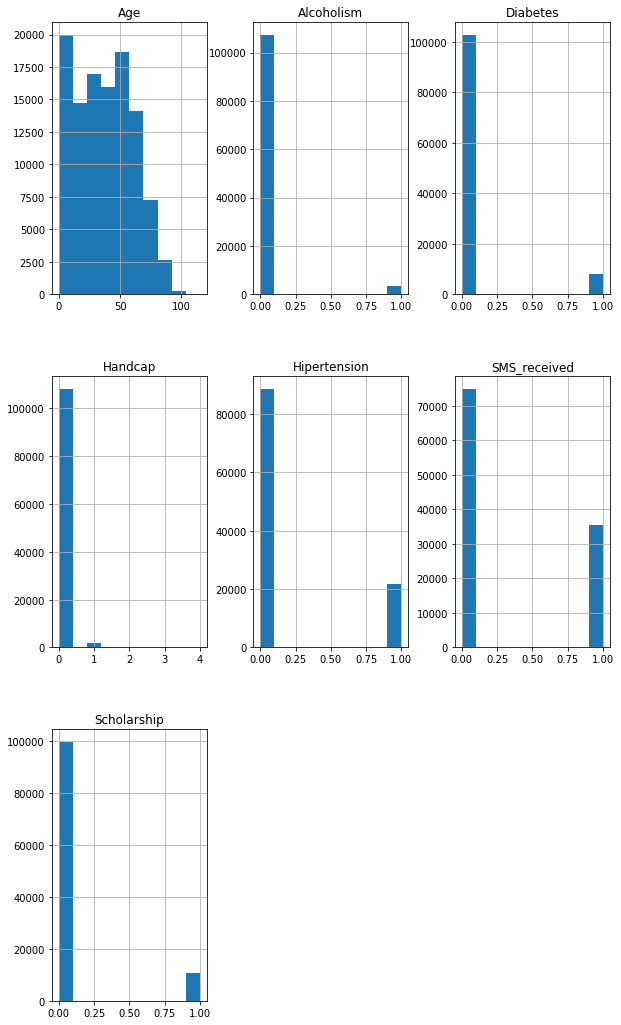

In [23]:
#histogram of the enitre dataframe
appointments.hist(figsize = (10,18));



### Research Question 1: What factor made people show up?

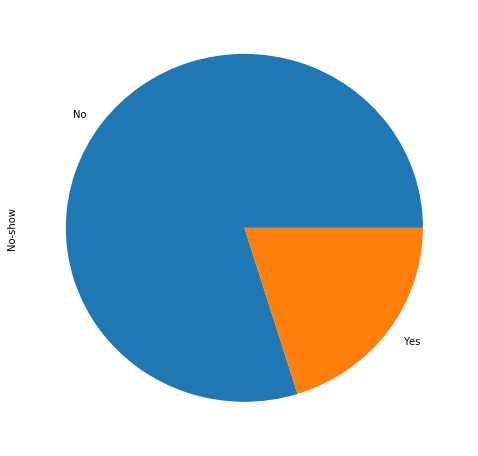

In [24]:
#Number of people who showed up (No) and people who did not show up (yes)
appointments['No-show'].value_counts()
appointments['No-show'].value_counts().plot(kind = 'pie', figsize = (8,8))

Text(0,0.5,'Scholarship')

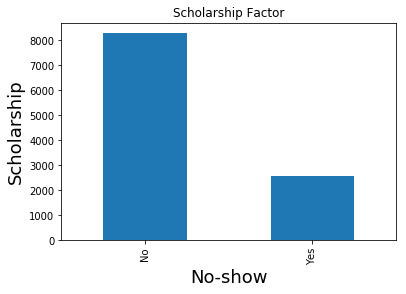

In [25]:
#plotting the people with Health Scholarship against no-show
scholarship_factor = appointments.groupby(['No-show'])['Scholarship'].sum()
scholarship_factor.plot(kind = 'bar', title = 'Scholarship Factor')
plt.xlabel('No-show', fontsize = 18)
plt.ylabel('Scholarship', fontsize = 18)

Text(0,0.5,'SMS_received')

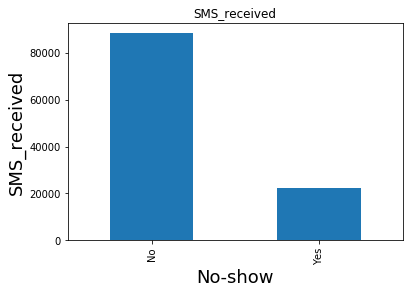

In [26]:
#plotting the SMS recieved against no-show
SMS_received_factor = appointments.groupby(['No-show'])['SMS_received'].count()
SMS_received_factor.plot(kind = 'bar', title = 'SMS_received')
plt.xlabel('No-show', fontsize = 18)
plt.ylabel('SMS_received', fontsize = 18)


### Research Question 2: Is their a particular illness that makes the patient to likely show up?

Text(0,0.5,'Hipertension')

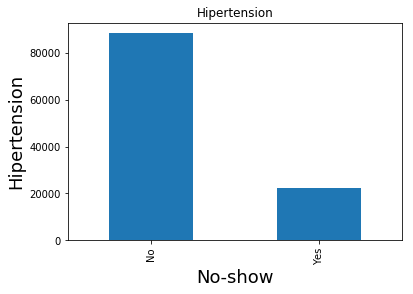

In [27]:
Hipertension_factor = appointments.groupby(['No-show'])['Hipertension'].count()
Hipertension_factor.plot(kind = 'bar', title = 'Hipertension')
plt.xlabel('No-show', fontsize = 18)
plt.ylabel('Hipertension', fontsize = 18)

Text(0,0.5,'Diabetes')

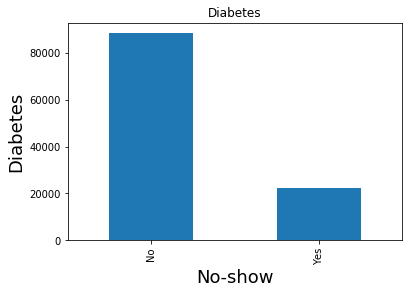

In [28]:
#plotting the Diabetes against no-show
Diabetes_factor = appointments.groupby(['No-show'])['Diabetes'].count()
Diabetes_factor.plot(kind = 'bar', title = 'Diabetes')
plt.xlabel('No-show', fontsize = 18)
plt.ylabel('Diabetes', fontsize = 18)

Text(0,0.5,'Alcoholism')

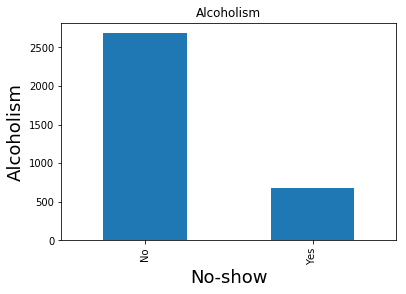

In [29]:
#plotting the Alcoholism against no-show
Alcoholism_factor = appointments.groupby(['No-show'])['Alcoholism'].sum()
Alcoholism_factor.plot(kind = 'bar', title = 'Alcoholism')
plt.xlabel('No-show', fontsize = 18)
plt.ylabel('Alcoholism', fontsize = 18)

Text(0,0.5,'Handcap')

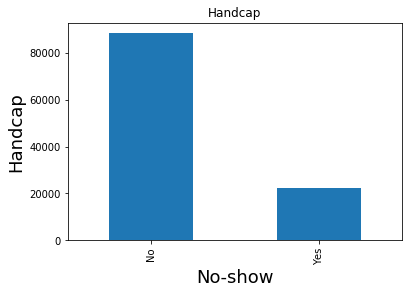

In [30]:
#plotting the Handcap against no-show
Handcap_factor = appointments.groupby(['No-show'])['Handcap'].count()
Handcap_factor.plot(kind = 'bar', title = 'Handcap')
plt.xlabel('No-show', fontsize = 18)
plt.ylabel('Handcap', fontsize = 18)


## Conclusions

>The data set of 100k sample is not enough to make a prediction on showing up or not.

>The data set did not include;
>
<ul>
<li><a href=>What means of transportation the patients used</a></li>
<li><a href=>Who booked the appointment, was it a Nurse, Doctor or who?</a></li>
<li><a href=>Is it their first appointment or second or ?</a></li>
</ul>
 
